<a href="https://colab.research.google.com/github/huberyhub/deep_learning_ait/blob/main/5_AIT_Deep_learning_Exercise_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copyright

<PRE>
Copyright (c) 2023 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Use this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>



# California housing prices - modeling
In this notebook we will:
* using California housing prices data (https://www.kaggle.com/camnugent/california-housing-prices)
* exploring the data
* creating a model
* training the model
* evaluation on test data
* making predictions and regression plot

Exercises:
* please complete TODO parts


In [281]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [282]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [283]:
# load California Housing Prices dataset
housing = fetch_california_housing()
X,Y = housing['data'], housing['target']
nb_samples = X.shape[0]
print(nb_samples)

20640


In [284]:
X.shape, Y.shape

((20640, 8), (20640,))

Splitting data into training, validation and test sets:

In [285]:
valid_split = 0.2
test_split  = 0.1

# calculate the validation and test split points
v_point = int(nb_samples * (1 - valid_split - test_split))
t_point = int(nb_samples * (1 - test_split))

X_train = X[:v_point]
Y_train = Y[:v_point]
X_valid = X[v_point:t_point]
Y_valid = Y[v_point:t_point]
X_test  = X[t_point:]
Y_test  = Y[t_point:]
print(X_train.shape[1])

8


Standardization of the data:

In [286]:
mean    = np.mean(X_train, axis=0)
std     = np.std(X_train, axis=0)
X_train = (X_train - mean) / std
X_valid = (X_valid - mean) / std
X_test  = (X_test - mean) / std

print("Mean values of the training, validation and test input data:", X_train.mean(), X_valid.mean(), X_test.mean())
print("Standard deviation of the training, validation and test input data:", X_train.std(), X_valid.std(), X_test.std())

Mean values of the training, validation and test input data: -8.41949864078967e-16 -0.033829980667358275 -0.05498069244049446
Standard deviation of the training, validation and test input data: 1.0 1.0511230319365579 1.998856651869891


Model definition, hints:
* one or two hidden layers and 8-64 neurons / layer
* the hidden layers should have non-linear activation functions
* the input and output layers' sizes are defined by the data
* as the output is continuous, it can be a linear layer

In [287]:
# Define the model
model = Sequential()
model.add(Dense(30, activation='sigmoid', input_shape=(X_train.shape[1],)))
model.add(Dense(30, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1))

Inspect the model summary:

In [288]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 30)                270       
                                                                 
 dense_60 (Dense)            (None, 30)                930       
                                                                 
 dense_61 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1231 (4.81 KB)
Trainable params: 1231 (4.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Number of trainable parameters in the model: TODO

Compiling the model, hints:
* the loss function has to match the task (regession)
* you should try ADAM and/or SGD optimizer

In [289]:
# Compile the model with a lower learning rate
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

Defining the earlystopping callback function:

In [290]:
es = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

Train the model, use training and validation data and apply early stopping:

In [291]:
model.fit(X_train, Y_train,
        validation_data=(X_valid,Y_valid),
        batch_size=100,
        epochs=1000000,
        verbose=1,
        callbacks=[es])

%load_ext tensorboard
%tensorboard --logdir logs

Epoch 1/1000000


145/145 [==============================] - 0s 821us/step - loss: 0.7301 - accuracy: 0.0034 - val_loss: 0.6101 - val_accuracy: 0.0015
Epoch 2/1000000
145/145 [==============================] - 0s 470us/step - loss: 0.3708 - accuracy: 0.0034 - val_loss: 0.5837 - val_accuracy: 0.0015
Epoch 3/1000000
145/145 [==============================] - 0s 462us/step - loss: 0.3446 - accuracy: 0.0034 - val_loss: 0.6758 - val_accuracy: 0.0015
Epoch 4/1000000
145/145 [==============================] - 0s 462us/step - loss: 0.3302 - accuracy: 0.0034 - val_loss: 0.5465 - val_accuracy: 0.0015
Epoch 5/1000000
145/145 [==============================] - 0s 469us/step - loss: 0.3153 - accuracy: 0.0034 - val_loss: 0.5786 - val_accuracy: 0.0015
Epoch 6/1000000
145/145 [==============================] - 0s 471us/step - loss: 0.3161 - accuracy: 0.0034 - val_loss: 0.6045 - val_accuracy: 0.0015
Epoch 7/1000000
145/145 [==============================] - 0s 467us/step - loss: 0.3139 - accuracy: 0.0033 - val_loss: 0.6

Reusing TensorBoard on port 6006 (pid 3994), started 0:17:36 ago. (Use '!kill 3994' to kill it.)

!kill 3994

Evaluate the model on the test data:

In [292]:
model.evaluate(X_test, Y_test)

65/65 [==============================] - 0s 816us/step - loss: 0.2492 - accuracy: 0.0034


[0.2491617649793625, 0.0033914728555828333]

In [293]:
from sklearn.metrics import mean_squared_error
Y_pred = model.predict(X_test)
print(mean_squared_error(Y_test, Y_pred))

65/65 [==============================] - 0s 427us/step
0.24916176752483507


Run inference on the test data:

In [294]:
preds = model.predict(X_test)


65/65 [==============================] - 0s 329us/step


Inspect the result on a regression plot:

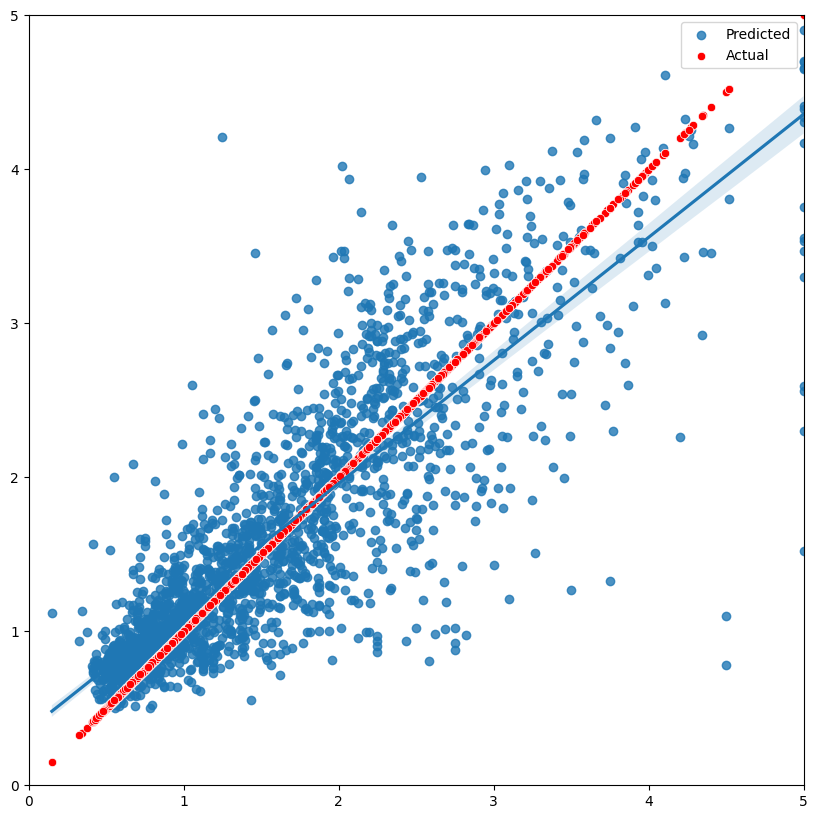

In [295]:
plt.figure(figsize=(10,10))
sns.regplot(x=Y_test.reshape(-1), y=preds.reshape(-1), label='Predicted')
sns.scatterplot(x=Y_test.reshape(-1), y=Y_test.reshape(-1), color='red', label='Actual')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.legend()
plt.show()

In [296]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, Y_train)

# Make predictions
linear_preds = linear_model.predict(X_test)

# Calculate the mean squared error of the predictions
linear_mse = mean_squared_error(Y_test, linear_preds)

print("Mean Squared Error of Linear Regression: ", linear_mse)


Mean Squared Error of Linear Regression:  0.32221967788457506


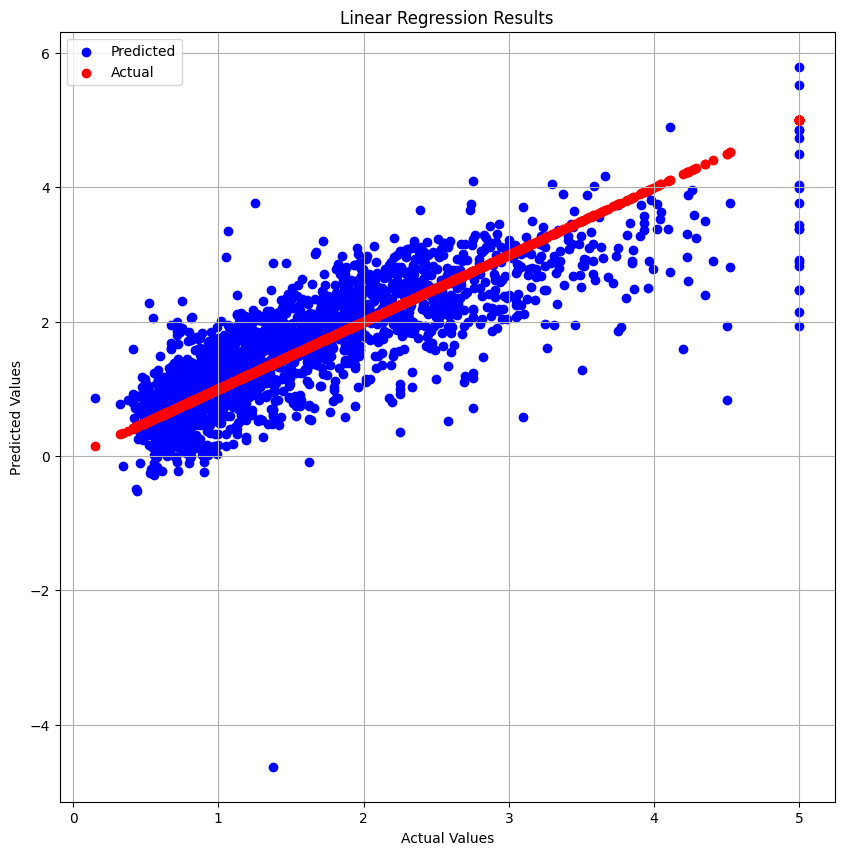

In [297]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, linear_preds, color='blue', label='Predicted')
plt.scatter(Y_test, Y_test, color='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Results')
plt.legend()
plt.grid(True)
plt.show()


In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Binarize the target variable based on a threshold
threshold = 2.0 # Define your threshold here
Y_train_binary = (Y_train > threshold).astype(int)
Y_test_binary = (Y_test > threshold).astype(int)

# Create a Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, Y_train_binary)

# Make predictions
logistic_preds = logistic_model.predict(X_test)

# Evaluate the model
print(classification_report(Y_test_binary, logistic_preds))
print(confusion_matrix(Y_test_binary, logistic_preds))


              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1483
           1       0.81      0.78      0.79       581

    accuracy                           0.89      2064
   macro avg       0.86      0.85      0.86      2064
weighted avg       0.88      0.89      0.88      2064

[[1377  106]
 [ 130  451]]


In [299]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, Y_train)

# Make predictions
rf_preds = rf_model.predict(X_test)

# Calculate the mean squared error of the predictions
rf_mse = mean_squared_error(Y_test, rf_preds)

print("Mean Squared Error of Random Forest Regression: ", rf_mse)


Mean Squared Error of Random Forest Regression:  0.23496551262144613


In [300]:
print("""
      __
     / _)
  _.)/_/
 (_.)._.)
""")



      __
     / _)
  _.)/_/
 (_.)._.)

